# Installing libraries

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Importing libraries and setting styles

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#  Data Loading and Initial Exploration

In [5]:

file_path = 'car data.csv' # Now correctly using your assumed filename
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please ensure the CSV is in the correct directory.")
    exit()

# Feature Engineering: Extract Car Brand (Goodwill) from the Car_Name

df['CarBrand'] = df['Car_Name'].apply(lambda x: x.split(' ')[0])
df.drop('Car_Name', axis=1, inplace=True) # Drop the original lengthy name column

# Data Cleaning: Fix minor naming inconsistencies
df['CarBrand'].replace({
    'porsche': 'porcshce', 'maxda': 'mazda', 'toyouta': 'toyota',
    'vokswagen': 'volkswagen', 'vw': 'volkswagen', 'Nissan': 'nissan',
    'subaru': 'subaru'
}, inplace=True)
df['CarBrand'] = df['CarBrand'].str.lower() # Standardize case

print("\nTop 10 Car Brands for goodwill feature:")
print(df['CarBrand'].value_counts().head(10))


Dataset loaded successfully.

Top 10 Car Brands for goodwill feature:
CarBrand
city        26
bajaj       25
royal       17
corolla     17
honda       17
hero        15
verna       14
etios       11
fortuner    11
brio        10
Name: count, dtype: int64


/tmp/ipykernel_4645/26599068.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarBrand'].replace({


# Define Features and Target

In [8]:

# The target variable is 'price'
TARGET = 'Selling_Price'
X = df.drop(TARGET, axis=1)
y = df[TARGET]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 240 samples
Testing set size: 61 samples


# Data Preprocessing and Pipeline Creation

In [9]:

# Identify column types
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Define Preprocessing Steps
# 1. Scaling numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# 2. One-hot encoding categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns (none expected here)
)

# Create the full modeling pipeline: Preprocessing -> Model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression()) # Using Linear Regression as the base model
])

print("\nPreprocessing pipeline created successfully.")



Preprocessing pipeline created successfully.


#  Model Training and Evaluation

In [10]:
# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} (This is the average error in USD)")
print(f"R-squared Score (R2): {r2:.4f} (Closer to 1.0 is better)")


Mean Squared Error (MSE): 2.66
Root Mean Squared Error (RMSE): 1.63 (This is the average error in USD)
R-squared Score (R2): 0.8843 (Closer to 1.0 is better)


# Visualization

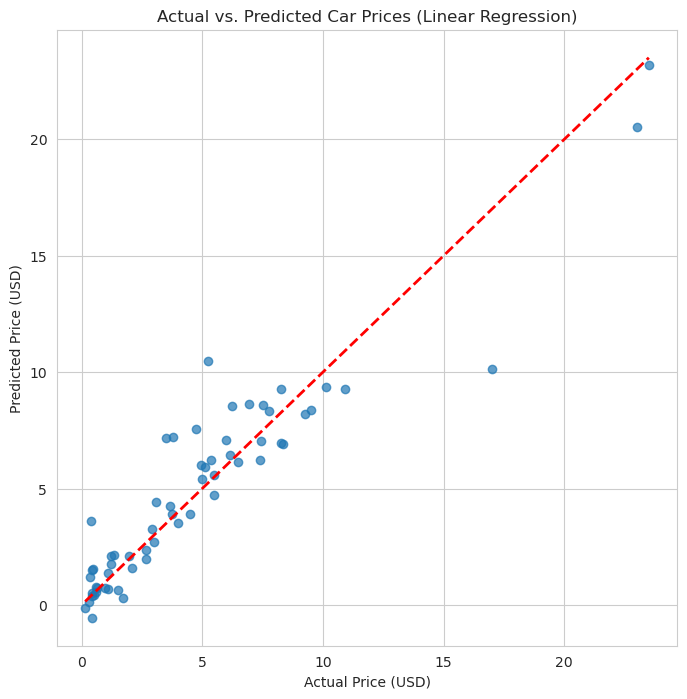

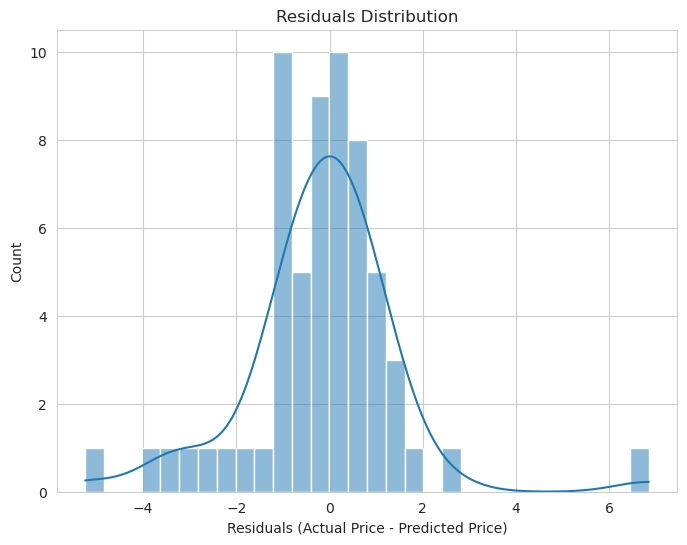


Analysis Complete. The Linear Regression model can predict car prices with an average error of approximately  1


In [12]:

# Plot Actual vs. Predicted Prices
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Car Prices (Linear Regression)')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.show()

# Residuals Plot (Should be randomly scattered around zero)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual Price - Predicted Price)')
plt.show()

print("\nAnalysis Complete. The Linear Regression model can predict car prices with an average error of approximately ", int(rmse))